In [1]:
import flaremodel as fm
import numpy as np
import matplotlib.pyplot as plt
SAVE_PLOT = True

In [2]:
nus = np.logspace(7, 13, 100)
SgrA = fm.SgrA()

B, ne, R, x, p, g_min, g_max, incang, rsteps = 10, 1e7, SgrA.Rs, 50., 1, 3., 1e4, -1, 50

edist = "powerlaw"
R2 = R
R1 = R2/x

params = [p, g_min, g_max]

In [3]:
n = 2.
m = 1.
p = 3. # equivalent to a=1

params = [p, g_min, g_max]

r_p_fun = lambda r, n: (r/R1)**-n
r_pm_fun = lambda r: r_p_fun(r, m) # Radial B field
r_pn_fun = lambda r: r_p_fun(r, n) # Radial edist

In [4]:
def L_nu_bg_fun(nus):
    s = n + m*((p-1)/2.+1)
    j_nu_pl_br = fm.j_nu_brute(nus, ne, B, params, "powerlaw", incang=-1)
    return 4*np.pi*4*np.pi*R1**3*j_nu_pl_br*(x**(3-s)-1)/(3-s)

L_nu_bg = L_nu_bg_fun(nus)

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


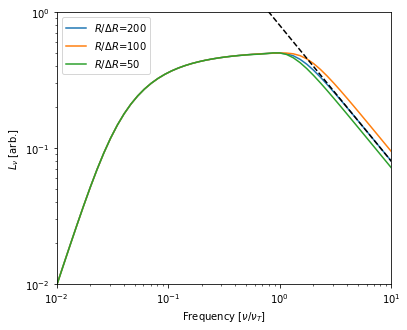

In [5]:
plt.figure(figsize=(6,5))
for i in [4, 2, 1]:
    sr_sp = fm.RadialSphere(n_r_fun=r_pn_fun, B_r_fun=r_pm_fun, 
                            edist=edist, rsteps=int((i)*x)) 
    sr_sp_syn = sr_sp.compute_synchrotron(nus, ne, [R2, R1, -1], B, params)
    if i == 4:
        nu_t = nus[np.argmax(sr_sp_syn)]
        syn_p = np.max(sr_sp_syn)
    plt.loglog(nus/nu_t, sr_sp_syn/syn_p/2, label=r"$R/\Delta R$=%d" % (50*i))
plt.loglog(nus/nu_t, L_nu_bg/syn_p/2, 'k--')
plt.legend(loc=2)
plt.ylim([1e-2, 1])
plt.xlim([1e-2, 10])
plt.ylabel(r"$L_\nu$ [arb.]")
plt.xlabel(r"Frequency $[\nu/\nu_T]$")
if SAVE_PLOT: plt.savefig("BG85_pl.eps", bbox_inches="tight", dpi=300)